# Final Project 1
## Perkenalan
Teammate:
1. Nabila Zulfika Hemadewi
2. Vista Sasmita Padmanagara

Studi Independen - Kampus Merdeka
Dataset yang kami gunakan yaitu Uber and Lyft Dataset Boston, MA yang berisi record data perjalanan taksi uber dan lyft di Boston, MA. Dataset ini terdiri dari 57 kolom dan 693.071 data. Dataset diperoleh dari kaggle.

Pada final project 1 ini kami akan membuat prediksi harga taksi Uber berdasarkan variabel cab_type, distance, surge_multiplier, dan name. 

Variabel dependennya yaitu price dan variabel independennya yaitu cab_type, distance, surge_multiplier, dan name.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Pustaka

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocess
from sklearn.preprocessing import StandardScaler,LabelEncoder

#model_selection
from sklearn.model_selection import train_test_split

#import the necessary modelling algos.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#evalution
from sklearn.metrics import r2_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

## Data Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/rideshare_kaggle.csv")

**Dimensi data**

In [ ]:
df.shape

(693071, 57)

Diketahui, data kita terdiri dari **693071 baris** dan **57 kolom**.

Mari kita lihat 5 data teratas df!

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Label kita berada di **cab_type**, isinya:

In [ ]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

### Cek Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Interpretasi** : Dataset diatas terdiri dari column dengan type float sebanyak 29, int sebanyak 17, dan object sebanyak 11. Dari data diatas bisa terlihat dengan jelas bahwa price memiliki jumlah non-null yang hanya 637976 dari 693071 data, artinya terdapat null value didalamnya yang perlu kita atasi dengan cleaning data.

## Cleaning Data



### Cek null values

In [ ]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**Kolom price memiliki nilai null sebanyak 55095**, lakukan **fillna()** untuk mengisinya dan gunakan **median** untuk mengisinya, lalu cek kembali apakah null values sudah teratasi semua.

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Cek duplicated values

In [ ]:
df.duplicated().sum()

0

'0', artinya **Tidak ada nilai yang terduplikat**. Sekarang dataframe kita sudah bersih dari nilai null dan duplikat.

In [ ]:
df['name'] = df['name'].str.replace('Black SUV', 'BlackSUV')
df['name'] = df['name'].str.replace('Lyft Black XL', 'LyftBlackXL')
df['name'] = df['name'].str.replace('Lyft XL', 'LyftXL')
df['name'] = df['name'].str.replace('Lux Black XL', 'LuxBlackXL')
df['name'] = df['name'].str.replace('Lux Black', 'LuxBlack')

In [ ]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'LuxBlackXL', 'LyftXL', 'LuxBlack',
       'UberXL', 'Black', 'UberX', 'WAV', 'BlackSUV', 'UberPool'],
      dtype=object)

# EDA (Exploratory Data Analysis)

## Manakah yang lebih mahal, Uber atau Lyft?

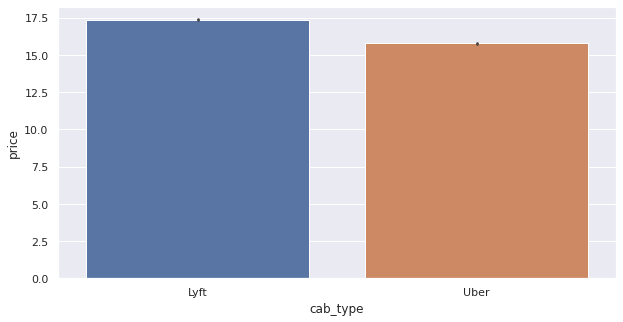

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='cab_type', y='price', data=df)

In [ ]:
df.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.795343
Name: price, dtype: float64

## Apakah benar jenis produk yang dimiliki oleh Uber dan Lyft mempengaruhi tarif perjalanan?

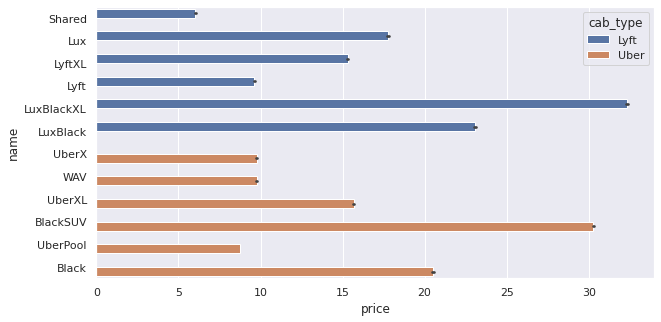

In [ ]:
df.sort_values('cab_type', inplace=True)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(y='name', 
            x='price',
            data=df,
            hue='cab_type')

In [ ]:
df.groupby('name')['price'].mean()

name
Black         20.523786
BlackSUV      30.286763
Lux           17.771240
LuxBlack      23.062468
LuxBlackXL    32.324086
Lyft           9.610885
LyftXL        15.309363
Shared         6.029893
UberPool       8.752500
UberX          9.765074
UberXL        15.678144
WAV            9.765019
Name: price, dtype: float64

Berdasarkan grafik diatas terbukti bahwa jenis taksi yang dimiliki Uber dan Lyft mempengaruhi tarif/harga perjalanan yang akan dikenakan kepada penumpang.

Menurut dataset:
- **Produk Lyft** yang termahal adalah Lux Black XL dengan harga rata-rata perjalanannya sebesar 30.50 USD dan produk termurahnya adalah Shared dengan harga rata-rata perjalannya sebesar 5.99 USD.

- **Produk Uber** yang termahal adalah Black SUV dengan harga rata-rata perjalanannya sebesar 30.29 USD dan produk termurahnya adalah UberPool dengan harga rata-rata perjalannya sebesar 8.75 USD.

## Apakah ada korelasi antara jarak yang ditempuh dengan tarif perjalanan?

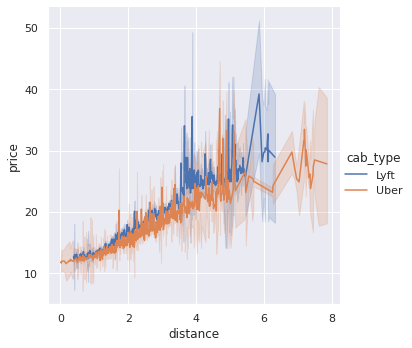

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.relplot(kind='line',
            x='distance',
            y='price',
            data=df,
            hue='cab_type')

Berdasarkan grafik diatas dapat dilihat bahwa semakin besar jarak yang ditempuh oleh produk milik Uber dan Lyft maka semakin besar pula tarif perjalanan. Produk Lyft memiliki tarif lebih tinggi dibandingkan Uber walaupun jarak yang ditempuh tidak terlalu besar daripada Uber.

**Rincian data:**

In [ ]:
dist_price = df.pivot_table(values='distance',
                       index=['cab_type'],
                       columns=['day','month','price'],
                       aggfunc=np.mean,
                       fill_value=0)
dist_price = dist_price.T
dist_price = dist_price.reset_index(drop=False)

dist_price.sort_values('price', ascending=False, inplace=True)
print('Harga Tertinggi:')
print(dist_price.head(10))

Harga Tertinggi:
cab_type  day  month  price  Lyft  Uber
224         2     12   97.5  4.43  0.00
1166       17     12   92.0  5.36  0.00
110         1     12   92.0  5.37  0.00
822        14     12   92.0  4.39  0.00
708        13     12   92.0  3.75  0.00
1501       27     11   92.0  4.57  0.00
1047       16     12   92.0  4.37  0.00
1738       29     11   92.0  5.39  0.00
1623       28     11   92.0  3.89  0.00
1855       30     11   89.5  0.00  7.46


Perhatikan!
- Terdapat produk Lyft pada 2 Desember yang memasang tarif sebesar 97.5 USD untuk jarak perjalanan 4.43 satuan
- Terdapat produk Uber pada 30 November memberikan tarif sebesar 89.5 USD untuk jarak perjalanan 7.46 satuan.

## Manakah yang mengalami lonjakan pesanan tertinggi selama November dan Desember ini, Lyft atau Uber?

In [ ]:
surge_price = df.pivot_table(values='price',
                       index=['surge_multiplier'],
                       columns=['cab_type'],
                       aggfunc=np.mean,
                       fill_value=0)
surge_price.loc['mean'] = surge_price.mean()
surge_price = surge_price.T
surge_price = surge_price.reset_index(drop=False)
surge_price.sort_values('mean', ascending=False, inplace=True)

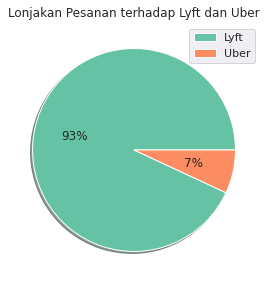

In [ ]:
colors = sns.color_palette('Set2')[0:2]

#create pie chart
plt.subplot(121)
plt.pie(surge_price['mean'],
        shadow = 'True',
        colors = colors,
        labels = None,
        autopct='%.0f%%')
plt.title("Lonjakan Pesanan terhadap Lyft dan Uber")
plt.legend(labels=surge_price.cab_type, loc='upper right')
plt.show()

Dari grafik diatas terlihat jelas, bahwa produk Lyft adalah produk yang paling tinggi lonjakan pesanannya selama 2 bulan ini yaitu November dan Desember.

**Mari kita lihat rincian datanya dibawah ini.**

In [ ]:
surge_price.drop(columns=['mean'], inplace=True)
print(surge_price)

surge_multiplier cab_type        1.0       1.25        1.5      1.75  \
0                    Lyft  16.583557  23.768471  28.894472  33.67376   
1                    Uber  15.795343   0.000000   0.000000   0.00000   

surge_multiplier        2.0        2.5        3.0  
0                 39.048459  30.207792  40.333333  
1                  0.000000   0.000000   0.000000  


Lonjakan pesanan Lyft sampai pada tingkat 3.0, sedangkan lonjakan pesanan Uber hanya sampai tingkat 1.0.

**Mari kita rincikan lagi datanya berdasarkan jenis-jenis produk Lyft dan Uber.**

In [ ]:
surge_price_nm = df.pivot_table(values='price',
                       index=['cab_type', 'name'],
                       columns=['surge_multiplier'],
                       aggfunc=np.mean,
                       fill_value=0)
surge_price_nm.loc['mean'] = surge_price_nm.mean()
surge_price_nm = surge_price_nm.T
surge_price_nm = surge_price_nm.reset_index(drop=False)
surge_price_nm.sort_values('surge_multiplier', ascending=False, inplace=True)

In [ ]:
surge_price_nm.drop(columns=['mean'], inplace=True)
print('Harga Tertinggi:')
print(surge_price_nm)

Harga Tertinggi:
   surge_multiplier  (Lyft, Lux)  (Lyft, LuxBlack)  (Lyft, LuxBlackXL)  \
6              3.00     0.000000          0.000000            0.000000   
5              2.50     0.000000          0.000000            0.000000   
4              2.00    34.344075         45.506237           63.613306   
3              1.75    30.480372         40.017562           56.113636   
2              1.50    26.220632         34.308490           47.631787   
1              1.25    21.495038         28.099910           39.255074   
0              1.00    17.113552         22.178923           31.103062   

   (Lyft, Lyft)  (Lyft, LyftXL)  (Lyft, Shared)  (Uber, Black)  \
6     29.750000       50.916667        0.000000       0.000000   
5     22.519481       37.896104        0.000000       0.000000   
4     17.331658       28.958543        0.000000       0.000000   
3     15.655992       26.101240        0.000000       0.000000   
2     13.731984       22.579467        0.000000       0.0000

Dari rincian data diatas diketahui:
- Lonjakan pesanan memang lebih berpengaruh terhadap harga produk Lyft daripada Uber.
- Harga produk Uber hanya terpengaruh sampai pada lonjakan ke 1.0.
- Produk Lyft yang mencapai lonjakan pesanan 3.0 adalah Lyft dengan harga lonjakan sebesar 29.7 USD dan Lyft XL dengan harga lonjakan sebesar 50.9 USD.

## Perjalanan darimana kemana yang memiliki harga perjalanan termahal dan termurah?

In [ ]:
location_price = df.pivot_table(values='price',
                       index=['name'],
                       columns=['source','destination'],
                       aggfunc=np.mean,
                       fill_value=0)
location_price.loc['mean'] = location_price.mean()
location_price = location_price.T
location_price = location_price.reset_index(drop=False)
location_price.sort_values('mean', ascending=False, inplace=True)

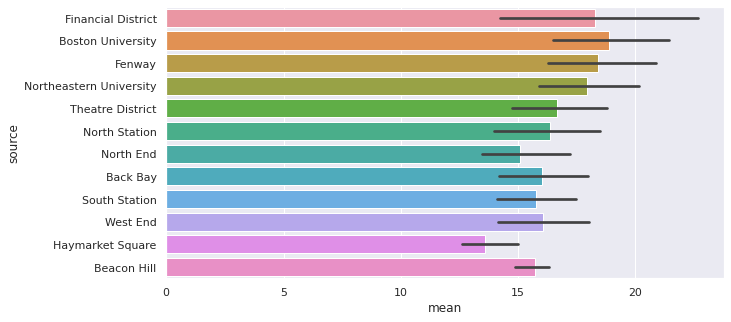

In [ ]:
location_price.sort_values('mean', ascending=False, inplace=True)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(x='mean', y='source', data=location_price)

In [ ]:
location_price.drop(columns=['mean'], inplace=True)
print('Harga Tertinggi:')
print(location_price.head(1))
print('')
print('')
print('Harga Terendah:')
print(location_price.tail(1))

Harga Tertinggi:
name              source        destination      Black   BlackSUV        Lux  \
24    Financial District  Boston University  34.228923  43.572633  28.366481   

name   LuxBlack  LuxBlackXL       Lyft     LyftXL    Shared  UberPool  \
24    37.477747   46.765647  14.248957  24.299722  9.324757  13.40013   

name      UberX     UberXL        WAV  
24    14.824903  25.151751  14.824903  


Harga Terendah:
name            source    destination      Black   BlackSUV        Lux  \
33    Haymarket Square  North Station  15.613158  26.877632  10.797636   

name   LuxBlack  LuxBlackXL      Lyft    LyftXL   Shared  UberPool     UberX  \
33    16.604312   26.926287  7.018081  9.166898  4.06815  6.789474  7.171711   

name    UberXL       WAV  
33    9.817105  7.171711  


Menurut dataset:
- Perjalanan dengan **harga rata-rata termahal adalah dari Financial District ke Boston University** sebesar 24.61 USD. Produk termahal untuk perjalanan ini adalah Lux Black XL milik Lyft dengan harga 46.77 USD dan produk termurahnya adalah Shared milik Lyft dengan harga 9.32 USD.

- Perjalanan dengan **harga rata-rata termurah adalah dari Haymarket Square ke North Station** sebesar 12.42 USD. Produk termahal untuk perjalanan ini adalah Lux Black XL milik Lyft dengan harga 26.92 USD dan produk termurahnya adalah Shared milik Lyft dengan harga 4.07 USD.

## Apakah faktor cuaca mampu mempengaruhi lonjakan jumlah pesanan?

In [ ]:
ss_price_sur = df.pivot_table(values='price',
                       index=['surge_multiplier'],
                       columns=['cab_type', 'short_summary'],
                       aggfunc=np.mean,
                       fill_value=0)
ss_price_sur.loc['mean'] = ss_price_sur.mean()
ss_price_sur = ss_price_sur.T
ss_price_sur = ss_price_sur.reset_index(drop=False)

ss_price_sur.sort_values('mean', ascending=False, inplace=True)

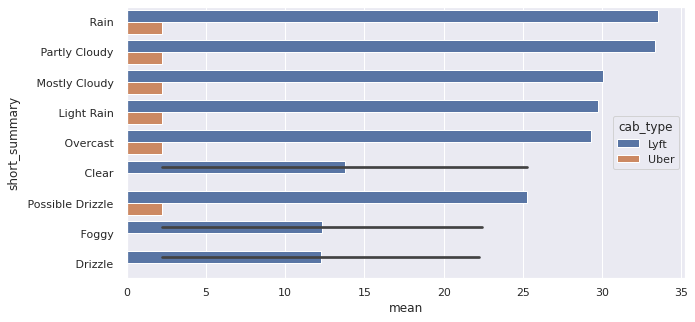

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='mean', y='short_summary', hue= df.cab_type, data=ss_price_sur)

Cuaca sangat mempengaruhi lonjakan pesanan yang terjadi, pada grafik diatas diketahui cuaca yang paling berpengaruh terhadap lonjakan pesanan adalah **Rain** dan **Partly Cloudy**.

In [ ]:
ss_price_sur.drop(columns=['mean'], inplace=True)
print(ss_price_sur)

surge_multiplier cab_type       short_summary        1.0       1.25  \
8                    Lyft               Rain   16.581970  23.615183   
6                    Lyft      Partly Cloudy   16.622169  24.095661   
4                    Lyft      Mostly Cloudy   16.593640  23.724283   
3                    Lyft         Light Rain   16.589515  23.796782   
5                    Lyft           Overcast   16.574693  23.750371   
0                    Lyft              Clear   16.519477  23.563738   
7                    Lyft   Possible Drizzle   16.539725  23.008361   
2                    Lyft              Foggy   16.682484  24.005650   
1                    Lyft            Drizzle   16.689300  24.076190   
13                   Uber      Mostly Cloudy   15.842580   0.000000   
12                   Uber         Light Rain   15.841686   0.000000   
17                   Uber               Rain   15.828894   0.000000   
16                   Uber   Possible Drizzle   15.808930   0.000000   
14    

- **Lonjakan pesanan tertinggi pada produk Lyft** terjadi pada saat cuaca **Rain** dengan lonjakan mencapai 3.0, tarif perjalanannya mencapai **65.00 USD**. 
- **Lonjakan pesanan terendah pesanan pada produk Lyft** terjadi pada cuaca **Drizzle** dengan lonjakan mencapai 2.5, tarif perjalanannya mencapai **18.00 USD**.
- **Lonjakan pesanan tertinggi pada produk Uber** terjadi pada saat cuaca **Mostly Cloudy** dengan lonjakan mencapai 1.0, tarif perjalanannya mencapai **15.51 USD**.
- **Lonjakan pesanan terendah pesanan pada produk Uber** terjadi pada cuaca **Foggy** dengan lonjakan mencapai 1.0, tarif perjalanannya mencapai **15.31 USD**.

## Correlation Analysis

Kita akan modelling Linear Regression mengenai harga Uber dan Lyft, disini kita tidak membutuhkan seluruh atribut yang ada untuk pemrosesan tersebut. Kita akan gunakan beberapa atribut yang dirasa berpengaruh terhadap modelling ini, yaitu:
- hour
- day
- month
- source
- destination
- cab_type
- name
- distance
- surge_multiplier
- latitude
- longitude
- temperature
- short_summary
- humidity
- visibility
- price

In [ ]:
new_column = ['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'short_summary', 'humidity', 'visibility', 'price']
df_new= df[new_column]
df_new.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,humidity,visibility,price
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.2148,-71.0330,42.34,Mostly Cloudy,0.68,10.000,5.0
280943,2,29,11,Fenway,Theatre District,Lyft,Lux,2.74,1.0,42.3429,-71.1003,37.92,Mostly Cloudy,0.71,9.981,19.5
280942,2,29,11,Fenway,Theatre District,Lyft,LyftXL,2.74,1.0,42.3429,-71.1003,37.92,Mostly Cloudy,0.71,9.981,16.5
280941,2,29,11,Fenway,Theatre District,Lyft,Lyft,2.74,1.0,42.3429,-71.1003,37.92,Mostly Cloudy,0.71,9.981,11.0
280940,2,29,11,Fenway,Theatre District,Lyft,Shared,2.74,1.0,42.3429,-71.1003,37.92,Mostly Cloudy,0.71,9.981,5.0


Lakukan pemrosesan LabelEncoder pada kolom kategorik.

In [ ]:
label = LabelEncoder()
df_new['source'] = label.fit_transform(df_new['source'])
df_new['destination'] = label.fit_transform(df_new['destination'])
df_new['cab_type'] = label.fit_transform(df_new['cab_type'])
df_new['name'] = label.fit_transform(df_new['name'])
df_new['short_summary'] = label.fit_transform(df_new['short_summary'])

Sekarang mari kita coba cek dari semua atribut milik df_new, mana yang memiliki korelasi tertinggi. Atribut-atribut dengan korelasi tertinggi lah yang akan kita pilih untuk modelling nantinya.

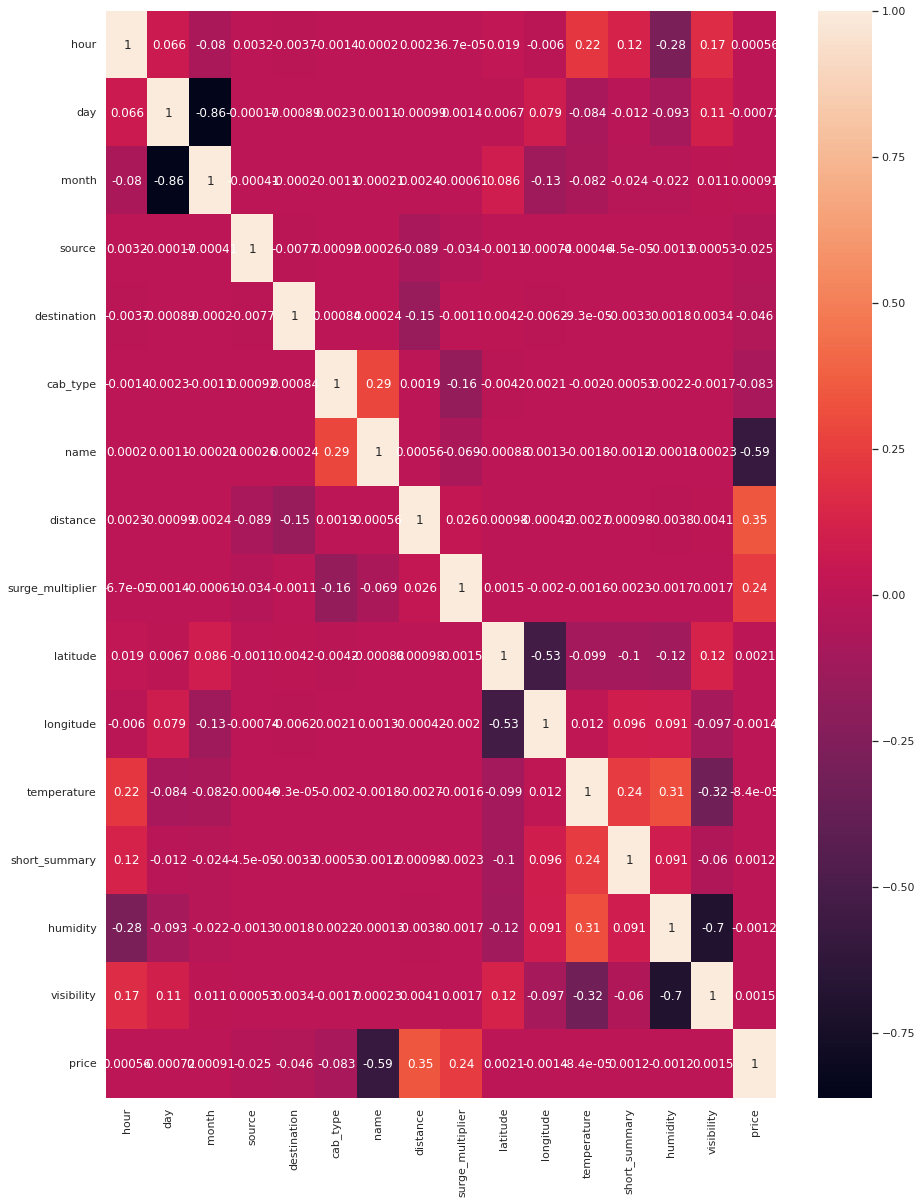

In [ ]:
plt.figure(figsize=(15,20))
sns.heatmap(df_new.corr(),annot=True)

Dari Heatmap diatas kita dapat lihat bahwa kolom yang berkorelasi paling tinggi dengan price dan unique kolom nya tepat (tidak terlalu banyak ) ada 5 yaitu : 
- cab_type
- name
- distance
- surge_multiplier
- price

In [ ]:
new_column = ['cab_type', 'name','source', 'destination', 'distance', 'surge_multiplier', 'price']
df_final= df[new_column]
df_final.head()

,cab_type,name,source,destination,distance,surge_multiplier,price
0,Lyft,Shared,Haymarket Square,North Station,0.44,1.0,5.0
280943,Lyft,Lux,Fenway,Theatre District,2.74,1.0,19.5
280942,Lyft,LyftXL,Fenway,Theatre District,2.74,1.0,16.5
280941,Lyft,Lyft,Fenway,Theatre District,2.74,1.0,11.0
280940,Lyft,Shared,Fenway,Theatre District,2.74,1.0,5.0


# Preprocessing

### Label Encoder



In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df_final['cab_type'] = label.fit_transform(df_final['cab_type'])
df_final['name'] = label.fit_transform(df_final['name'])
df_final['source'] = label.fit_transform(df_final['source'])
df_final['destination'] = label.fit_transform(df_final['destination'])

In [ ]:
df_final.tail()

,cab_type,name,source,destination,distance,surge_multiplier,price
304937,1,10,3,0,1.50,1.0,12.0
304936,1,9,3,0,1.50,1.0,7.5
304935,1,8,3,0,1.50,1.0,6.5
305034,1,8,7,9,2.17,1.0,9.0
693070,1,8,11,6,1.00,1.0,10.0


In [ ]:
df_final.head()

,cab_type,name,source,destination,distance,surge_multiplier,price
0,0,7,5,7,0.44,1.0,5.0
280943,0,2,3,10,2.74,1.0,19.5
280942,0,6,3,10,2.74,1.0,16.5
280941,0,5,3,10,2.74,1.0,11.0
280940,0,7,3,10,2.74,1.0,5.0


### Scaler Data

In [ ]:
scaler = StandardScaler()
datax = df_final.drop(['price'],axis=1)

In [ ]:
X = scaler.fit_transform(datax)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((510380, 6), (127596, 6), (510380,), (127596,))

# Modelling

## Linear Regression

In [ ]:
linear = LinearRegression()
linearmodel = linear.fit(X_train, y_train)
y_pred1 = linearmodel.predict(X_test)

In [ ]:
linear.score(X_train, y_train)

0.5136013595364496

In [ ]:
linear.score(X_test, y_test)

0.5165302114149686

In [ ]:
errors1 = abs(y_pred1 - y_test)
print("Mean Absolute Error:", round(np.mean(errors1), 2), "degrees.")

Mean Absolute Error: 5.17 degrees.


In [ ]:
lrmape = 100 * (errors1 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(lrmape)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 60.52 %.


In [ ]:
lrmae = mean_absolute_error(y_test, y_pred1)
lrmse = mean_squared_error(y_test, y_pred1)

print("mae: " + str(lrmae))
print("mse: " + str(lrmse))
print("accuracy :" + str(linear.score(X_test, y_test)))
print("variance :" + str(explained_variance_score(y_test, y_pred1)))

mae: 5.172768474520869
mse: 42.2772430963383
accuracy :0.5165302114149686
variance :0.5165305276631493


## Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 13)
rfmodel = rf.fit(X_train,y_train)
y_pred2 = rfmodel.predict(X_test)

In [ ]:
rf.score(X_train, y_train)

0.9728064859029945

In [ ]:
rf.score(X_test,y_test)

0.9700143187368108

In [ ]:
errors2 = abs(y_pred2 - y_test)
print("Mean Absolute Error:", round(np.mean(errors2), 2), "degrees.")

Mean Absolute Error: 1.02 degrees.


In [ ]:
rfmape = 100 * (errors2 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(rfmape)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 92.43 %.


In [ ]:
rfmae = mean_absolute_error(y_test, y_pred2)
rfmse = mean_squared_error(y_test, y_pred2)

print("mae: " + str(rfmae))
print("mse: " + str(rfmse))
print("accuracy :" + str(rf.score(X_test, y_test)))
print("variance :" + str(explained_variance_score(y_test, y_pred2)))

mae: 1.0210514611843295
mse: 2.622112003902818
accuracy :0.9700143187368108
variance :0.9700160805477566


Dari analisis yang telah dilakukan diperoleh beberapa kesimpulan diantaranya:

1. Terdapat 6 atribut/faktor yang sangat mempengaruhi penentuan tarif taksi online diantaranya cab_type, name, surge_multiplier, distance, destination, dan source.
2. Model yang paling tepat digunakan untuk dataset ini adalah random forest, dimana memiliki evaluasi model terbaik dari ketiga model lainnya. Dalam model random forest diperoleh hasil R Score Train sebesar 0.972 dan 0.970 untuk R Score Test, dan 2.62 untuk RMSE.

## Visualisasi Model

In [ ]:
data_model = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
data_model.head()

,Actual,Predicted
54756,13.5,12.673586
171726,15.5,14.252800
466624,13.5,12.710131
642288,38.5,40.021111
439944,5.0,4.348474


In [ ]:
X_new = {'cab_type':[1,2,3], 'distance':[1,2,3], 'surge_multiplier':[1,2,3], 'name':[0,1,0], 'destination':[1,2,3], 'source':[1,2,3]}
X_new = pd.DataFrame(X_new)

In [ ]:
y_pred = rf.predict(X_new)
print('Prediksi Tarif yaitu: ')
print(y_pred2)

Prediksi Tarif yaitu: 
[12.67358591 14.25279962 12.71013102 ... 20.81864297  5.4963954
  8.52346682]


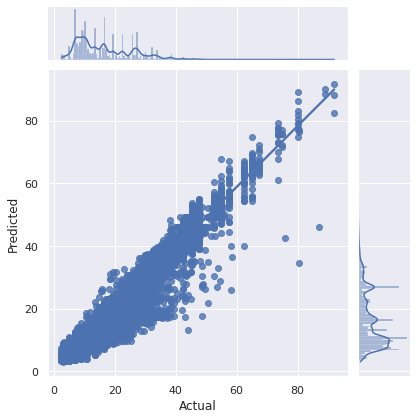

In [ ]:
sns.jointplot(x='Actual', y='Predicted', data=data_model, kind='reg')

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(rf)
 
# Load the pickled model
model_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
model_from_pickle.predict(X_test)



array([12.67358591, 14.25279962, 12.71013102, ..., 20.81864297,
        5.4963954 ,  8.52346682])

In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(rf, 'filename.pkl')
 
# Load the model from the file
model_from_joblib = joblib.load('filename.pkl')
 
# Use the loaded model to make predictions
model_from_joblib.predict(X_test)

array([12.67358591, 14.25279962, 12.71013102, ..., 20.81864297,
        5.4963954 ,  8.52346682])